# Dot

DotRender uses dot2tex which in turn TikZ in Latex.

https://dot2tex.readthedocs.io/en/latest/

https://github.com/kjellmf/dot2tex

https://graphviz.org/doc/info/lang.html

In [1]:
from pyfeyn2.feynmandiagram import FeynmanDiagram, Leg, Propagator, Vertex
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.render.latex.dot import DotRender, feynman_to_dot
import pyfeyn2
import copy
print(pyfeyn2.__version__)

2.1.0


In [2]:
fd = FeynmanDiagram()
v1 = Vertex("v1")
v2 = Vertex("v2")
v3 = Vertex("v3")
v4 = Vertex("v4")
p1 = Propagator("p1").connect(v2, v1).with_type("fermion").with_label("$\mu$")
p2 = Propagator("p2").connect(v1, v3).with_type("fermion")
p3 = Propagator("p3").connect(v3, v2).with_type("fermion")
p4 = Propagator("p4").connect(v4, v3).with_type("gluon")
p5 = Propagator("p5").connect(v4, v2).with_type("gluon")
l1 = Leg("l1").with_target(v1).with_type("gluon").with_incoming().with_xy(-2, 1)
l2 = Leg("l2").with_target(v1).with_type("gluon").with_incoming().with_xy(-2, -1)
l3 = Leg("l3").with_target(v2).with_type("gluon").with_outgoing().with_xy(2, -2)
l4 = Leg("l4").with_target(v3).with_type("gluon").with_outgoing().with_xy(2, 2)
l5 = Leg("l5").with_target(v4).with_type("gluon").with_outgoing().with_xy(2, 1)
l6 = Leg("l6").with_target(v4).with_type("gluon").with_outgoing().with_xy(2, -1)

fd.propagators.extend([p1, p2, p3, p4, p5])
fd.vertices.extend([v1, v2, v3, v4])
fd.legs.extend([l1, l2, l3, l4, l5, l6])

In [3]:
dr= DotRender(fd)

In [4]:
print(dr.get_src_dot())

graph G {
rankdir=RL;
layout=neato;
node [style="invis"];
		l1 [ pos="-2.0,1.0!"];
		l2 [ pos="-2.0,-1.0!"];
		l3 [ pos="2.0,-2.0!"];
		l4 [ pos="2.0,2.0!"];
		l5 [ pos="2.0,1.0!"];
		l6 [ pos="2.0,-1.0!"];
edge [style="decorate,postaction={decorate,draw,red,decoration={markings,mark=at position 0.5 with {\arrow{>}}}}",texmode="raw",label="$\mu$"];
		v2 -- v1;
edge [style="decorate,postaction={decorate,draw,red,decoration={markings,mark=at position 0.5 with {\arrow{>}}}}",texmode="raw",label=""];
		v1 -- v3;
edge [style="decorate,postaction={decorate,draw,red,decoration={markings,mark=at position 0.5 with {\arrow{>}}}}",texmode="raw",label=""];
		v3 -- v2;
edge [style="decorate,decoration={coil,aspect=0.3,segment length=1mm}",texmode="raw",label=""];
		v4 -- v3;
edge [style="decorate,decoration={coil,aspect=0.3,segment length=1mm}",texmode="raw",label=""];
		v4 -- v2;
edge [style="decorate,decoration={coil,aspect=0.3,segment length=1mm}",texmode="raw",label=""];
		l1 -- v1;
edge [style

Render Dot script via dot2tex, so tikz again. No need to fix points via dot here explicitly.

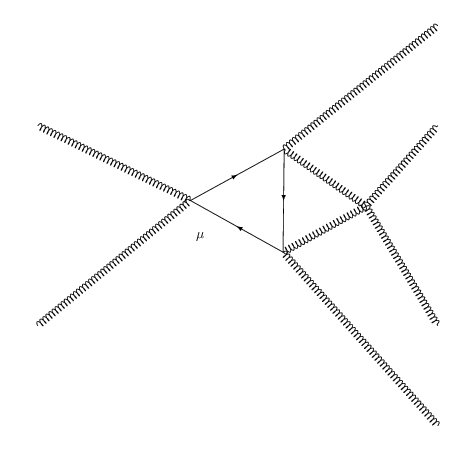

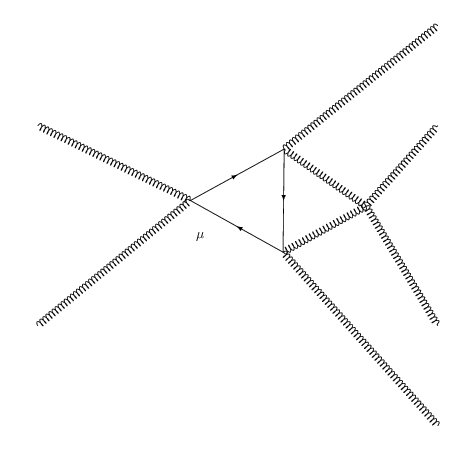

In [5]:
dr.render(resolution=100)

In [6]:
print(dr.get_src_diag())


\begin{tikzpicture}[>=latex,line join=bevel,]
%%
\begin{scope}
  \pgfsetstrokecolor{black}
  \definecolor{strokecol}{rgb}{1.0,1.0,1.0};
  \pgfsetstrokecolor{strokecol}
  \definecolor{fillcol}{rgb}{1.0,1.0,1.0};
  \pgfsetfillcolor{fillcol}
  \filldraw (0.0bp,0.0bp) -- (0.0bp,324.0bp) -- (342.0bp,324.0bp) -- (342.0bp,0.0bp) -- cycle;
\end{scope}
\begin{scope}
  \pgfsetstrokecolor{black}
  \definecolor{strokecol}{rgb}{1.0,1.0,1.0};
  \pgfsetstrokecolor{strokecol}
  \definecolor{fillcol}{rgb}{1.0,1.0,1.0};
  \pgfsetfillcolor{fillcol}
  \filldraw (0.0bp,0.0bp) -- (0.0bp,324.0bp) -- (342.0bp,324.0bp) -- (342.0bp,0.0bp) -- cycle;
\end{scope}
  \coordinate (l1) at (27.0bp,234.0bp);
  \coordinate (l2) at (27.0bp,90.0bp);
  \coordinate (l3) at (315.0bp,18.0bp);
  \coordinate (l4) at (315.0bp,306.0bp);
  \coordinate (l5) at (315.0bp,234.0bp);
  \coordinate (l6) at (315.0bp,90.0bp);
  \coordinate (v1) at (136.9bp,180.13bp);
  \coordinate (v2) at (203.59bp,142.95bp);
  \coordinate (v3) at (204.41b

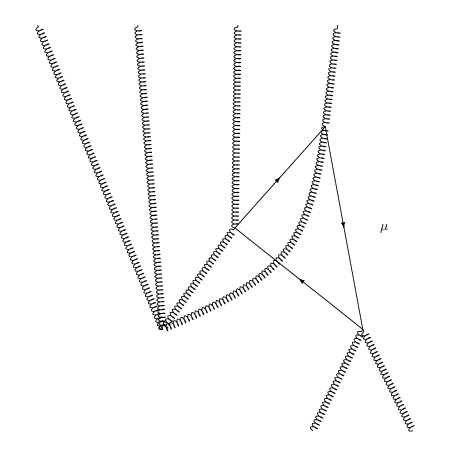

In [7]:
ffd = copy.deepcopy(fd).add_rule("diagram { layout : dot ; direction : up}")
DotRender(ffd).render(resolution=100,show=False)

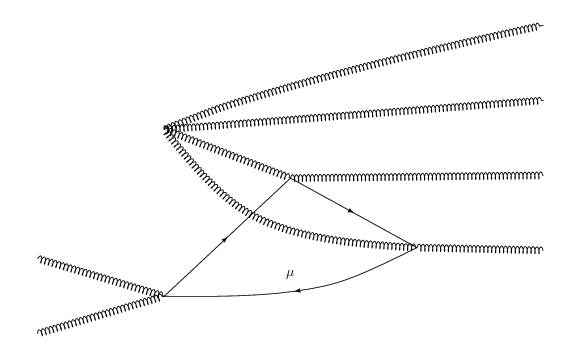

In [8]:
ffd = copy.deepcopy(fd).with_style("layout : dot ; direction : right")
DotRender(ffd).render(resolution=100,show=False)